In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

In [2]:
# Loading the data file
df = pd.read_csv('kc_house_data.csv')

In [3]:
# In this data analysis we will be analysing and predicting house prices based on the given components

In [4]:
print(df.isnull().sum())
print(df.dtypes)

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       2
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64
id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above       float64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


In [5]:
# Feature Engineering

# Age is defined as the difference between the current year (2023) and the year the house was built (yr_built).
# The measurement of age is in years.
df['age'] = 2023 - df['yr_built']
df['renovated'] = df['yr_renovated'].apply(lambda x: 1 if x > 0 else 0)
df['total_sqft'] = df['sqft_living'] + df['sqft_basement']

# Drop columns that are no longer needed
df = df.drop(columns=['id', 'date', 'yr_built', 'yr_renovated'])

# Fill any null values
df = df.fillna(0)
print(df.head())
df.to_csv('kc_house_data_reduced.csv', index=False)

      price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  221900.0         3       1.00         1180      5650     1.0           0   
1  538000.0         3       2.25         2570      7242     2.0           0   
2  180000.0         2       1.00          770     10000     1.0           0   
3  604000.0         4       3.00         1960      5000     1.0           0   
4  510000.0         3       2.00         1680      8080     1.0           0   

   view  condition  grade  sqft_above  sqft_basement  zipcode      lat  \
0     0          3      7      1180.0              0    98178  47.5112   
1     0          3      7      2170.0            400    98125  47.7210   
2     0          3      6       770.0              0    98028  47.7379   
3     0          5      7      1050.0            910    98136  47.5208   
4     0          3      8      1680.0              0    98074  47.6168   

      long  sqft_living15  sqft_lot15  age  renovated  total_sqft  
0 -122.257  

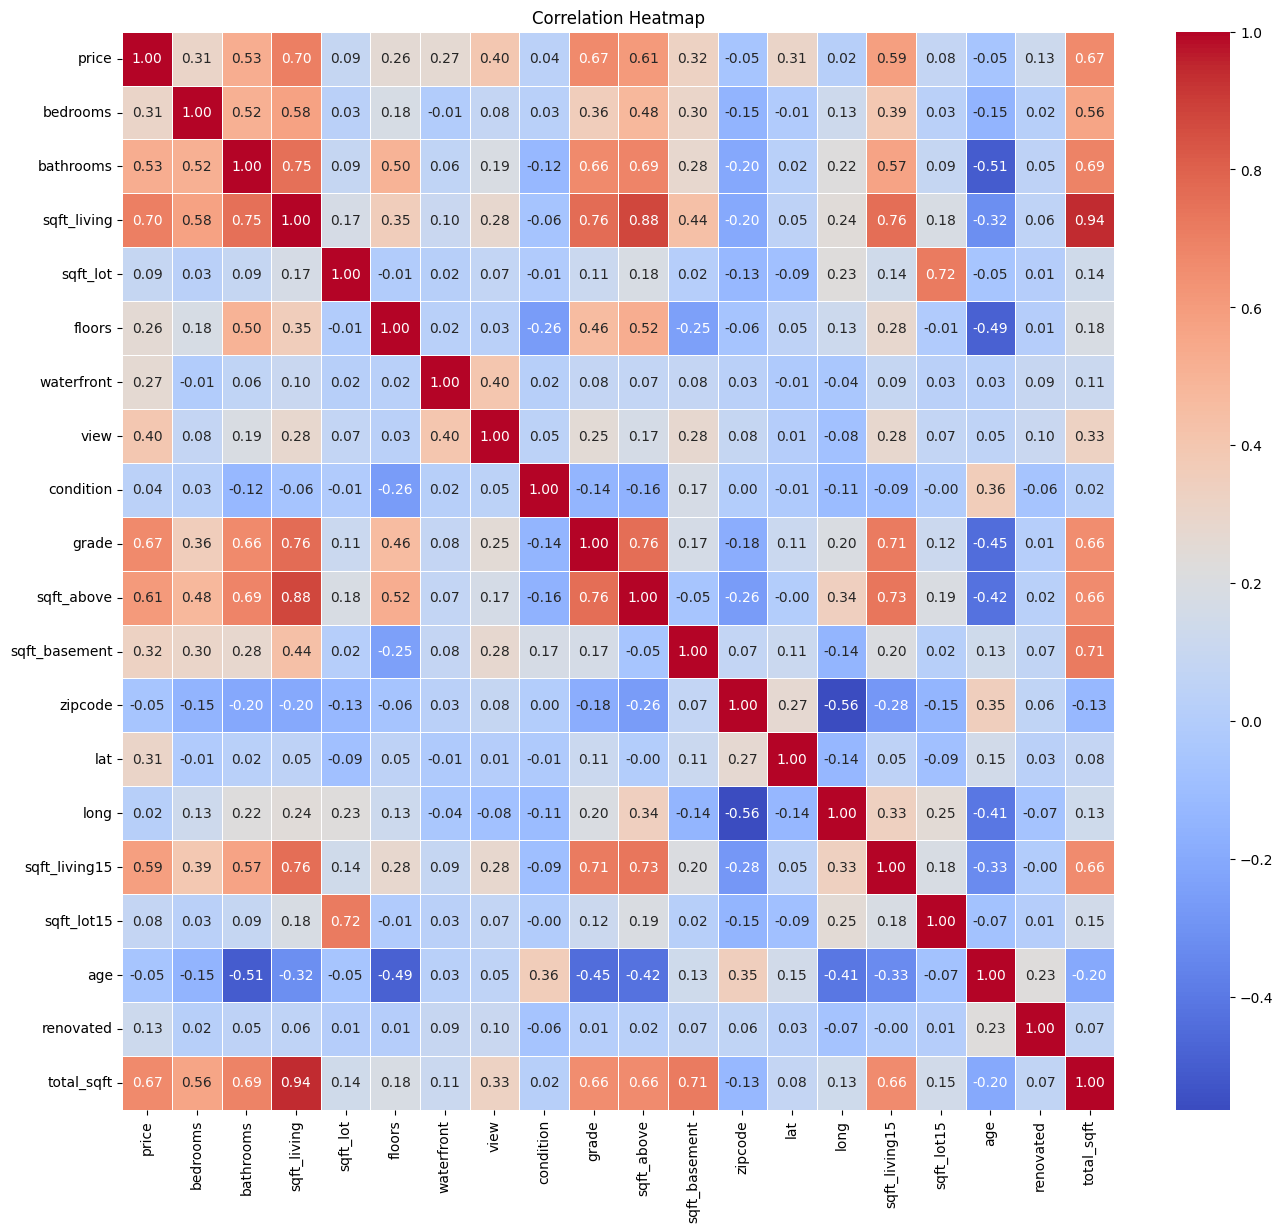

In [6]:
# Calculating the correlation matrix
corr = df.corr()

# Generating the heatmap
plt.figure(figsize=(16, 14))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [7]:
# Dropping columns with high correlation
threshold = 0.75
corr_matrix = corr.abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find columns with correlation greater than the threshold
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

# Drop the columns
df_reduced = df.drop(columns=to_drop)
print("Dropped columns:", to_drop)
print(df_reduced.head())
# Save the reduced dataframe to a new CSV file
df_reduced.to_csv('kc_house_data_reduced.csv', index=False)

Dropped columns: ['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'total_sqft']
      price  bedrooms  bathrooms  sqft_lot  floors  waterfront  view  \
0  221900.0         3       1.00      5650     1.0           0     0   
1  538000.0         3       2.25      7242     2.0           0     0   
2  180000.0         2       1.00     10000     1.0           0     0   
3  604000.0         4       3.00      5000     1.0           0     0   
4  510000.0         3       2.00      8080     1.0           0     0   

   condition  sqft_basement  zipcode      lat     long  sqft_lot15  age  \
0          3              0    98178  47.5112 -122.257        5650   68   
1          3            400    98125  47.7210 -122.319        7639   72   
2          3              0    98028  47.7379 -122.233        8062   90   
3          5            910    98136  47.5208 -122.393        5000   58   
4          3              0    98074  47.6168 -122.045        7503   36   

   renovated  
0          0  

In [ ]:
# The removal of Outliers so that the data can be accurate

# Calculate the Z-scores of the dataframe
z_scores = np.abs(stats.zscore(df_reduced.select_dtypes(include=[np.number])))

# Set a threshold for Z-scores
z_threshold = 3

# Filter out rows with Z-scores above the threshold
df_no_outliers = df_reduced[(z_scores < z_threshold).all(axis=1)]

# Save the reduced dataframe to a new CSV file
df_no_outliers.to_csv('kc_house_data_reduced.csv', index=False)

print("Outliers removed and data saved to 'kc_house_data_reduced.csv'")
# Printing the number of outliers before and after removal
outliers_before = (z_scores > z_threshold).sum().sum()
outliers_after = (np.abs(stats.zscore(df_no_outliers.select_dtypes(include=[np.number]))) > z_threshold).sum().sum()

print(f"Total number of rows including outliers: {len(df_reduced)}")
print(f"Number of rows remaining after outlier removal: {len(df_no_outliers)}")

Outliers removed and data saved to 'kc_house_data_reduced.csv'
Total number of rows including outliers: 21613
Number of rows remaining after outlier removal: 18891


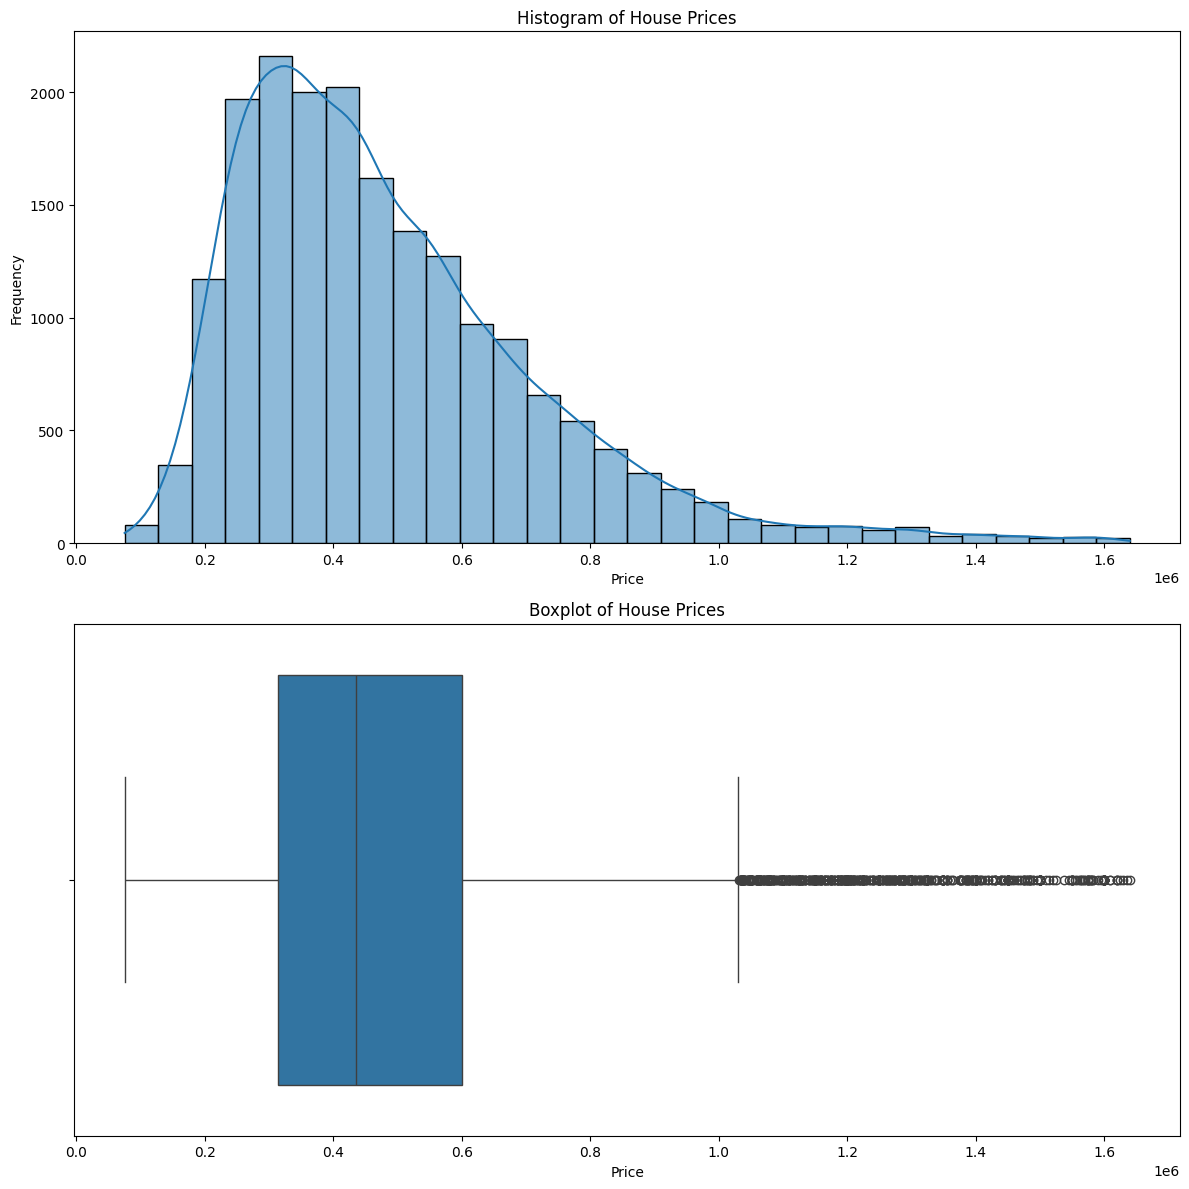

In [9]:
# Histogram and BoxPlot

plt.figure(figsize=(12, 12))

# Drawing the histogram
plt.subplot(2, 1, 1)
sns.histplot(df_no_outliers['price'], bins=30, kde=True)
plt.title('Histogram of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Drawing the Boxplot
plt.subplot(2, 1, 2)
sns.boxplot(x=df_no_outliers['price'])
plt.title('Boxplot of House Prices')
plt.xlabel('Price')

plt.tight_layout()
plt.show()

# Down here we can see that the histogram is Right Skewed

Mean Squared Error (Linear Regression): 73333146216.19214
R^2 Score (Linear Regression): 0.5149177070897297


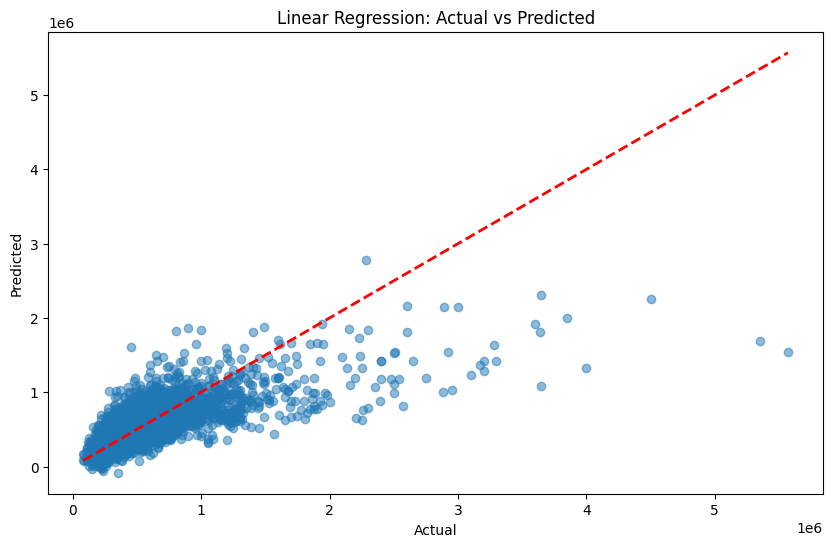

In [10]:
# Linear Regression Algorithm

# Here we want to find out the prediction of the price component, so we define it.
X = df_reduced.drop(columns=['price'])
y = df_reduced['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (Linear Regression): {mse}')
print(f'R^2 Score (Linear Regression): {r2}')

# plotting the Linear Regression module
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression: Actual vs Predicted')
plt.show()

In [11]:
# Decision Tree Regression

# Load the reduced dataset
df_reduced = pd.read_csv('kc_house_data_reduced.csv')

# Define the features and target variable
X = df_reduced.drop(columns=['price'])
y = df_reduced['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree model
tree_model = DecisionTreeRegressor(random_state=42)

# Train the model
tree_model.fit(X_train, y_train)

# Make predictions
y_pred_tree = tree_model.predict(X_test)

# Evaluate the model
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print(f'Mean Squared Error (Decision Tree): {mse_tree}')
print(f'R^2 Score (Decision Tree): {r2_tree}')

Mean Squared Error (Decision Tree): 19817292389.604656
R^2 Score (Decision Tree): 0.6427044211888056


Mean Squared Error (Gradient Boosting): 13355172160.593477
R^2 Score (Gradient Boosting): 0.7592131218821063


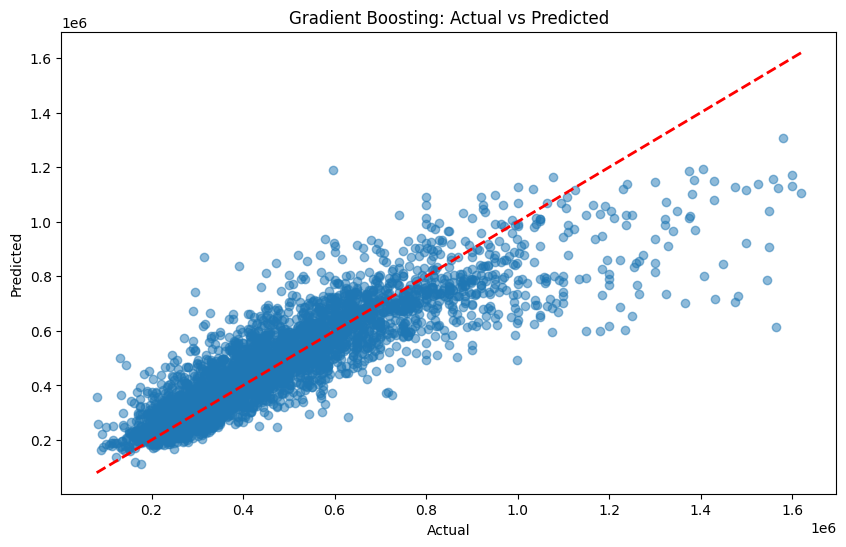

In [12]:
# Gradiant Boosting Algorithm

# Load the reduced dataset
df_reduced = pd.read_csv('kc_house_data_reduced.csv')

# Define the features and target variable
X = df_reduced.drop(columns=['price'])
y = df_reduced['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Gradient Boosting model
gb_model = GradientBoostingRegressor(random_state=42)

# Train the model
gb_model.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(f'Mean Squared Error (Gradient Boosting): {mse_gb}')
print(f'R^2 Score (Gradient Boosting): {r2_gb}')

# Plotting the Gradient Boosting results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_gb, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Gradient Boosting: Actual vs Predicted')
plt.show()

Mean Squared Error (Random Forest): 9589021469.19721
R^2 Score (Random Forest): 0.8271148798376216


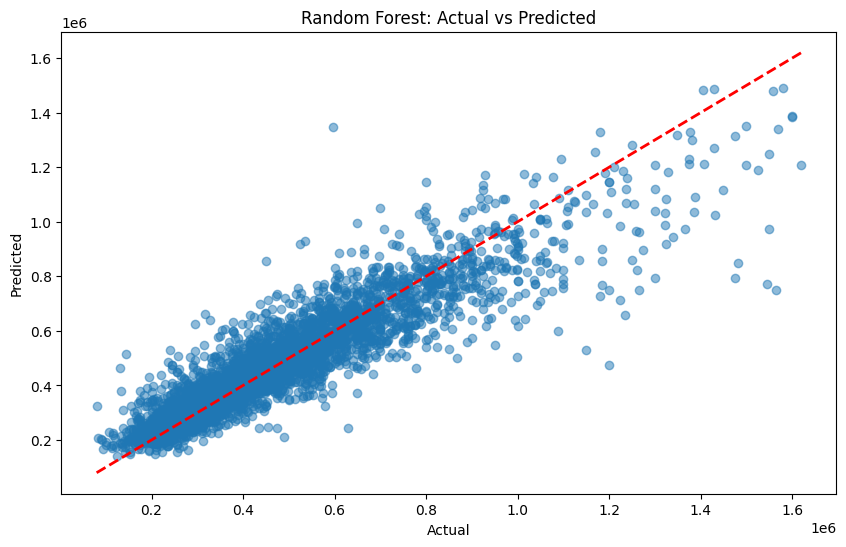

       bedrooms  bathrooms  sqft_lot  floors  waterfront  view  condition  \
12498         3       2.50      5348     2.0           0     0          3   
6904          4       2.00      6000     1.0           0     0          5   
15073         4       1.00     11383     1.5           0     0          5   
8410          3       1.75      5899     1.0           0     1          3   
15074         4       2.50      7526     2.0           0     0          3   

       sqft_basement  zipcode      lat     long  sqft_lot15  age  renovated  \
12498              0    98065  47.5347 -121.866        5205   23          0   
6904             760    98118  47.5453 -122.279        5500   70          0   
15073              0    98155  47.7429 -122.321       11213   76          0   
8410             500    98136  47.5399 -122.385        6244   37          0   
15074              0    98059  47.5123 -122.150        7526   34          0   

       predicted_price  
12498         506542.5  
6904        

In [13]:
# Random Forest Algorithm

# Load the reduced dataset
df_reduced = pd.read_csv('kc_house_data_reduced.csv')

# Define the features and target variable
X = df_reduced.drop(columns=['price'])
y = df_reduced['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Mean Squared Error (Random Forest): {mse_rf}')
print(f'R^2 Score (Random Forest): {r2_rf}')

# Plotting the Random Forest results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest: Actual vs Predicted')
plt.show()

# Add the predicted prices to the test set
X_test['predicted_price'] = y_pred_rf
print(X_test.head())
# Save the test set with the predicted prices to a new CSV file
X_test.to_csv('kc_house_data_with_predictions.csv', index=False)
print("Test set with predicted prices saved to 'kc_house_data_with_predictions.csv'")